<h1 align = "center" > Detection and Interpretation of Cardiac Arrhythmia from 12-Lead ECG Using Deep Neural Network </h1>

## Diagnostic Data EDA

## <a id=63></a>
### Project Content
1. [Introduction](#1)
    * 1.1 [Examining the Project Topic](#2)
    * 1.2 [Recognizing Variables In Dataset](#3)
2. [First Organization](#4)
    * 2.1 [Required Python Libraries](#5)
        * 2.1.1 [Basic Libraries](#6)
    * 2.2 [Loading The Dataset](#7)
    * 2.3 [Initial analysis on the dataset](#8)
3. [Preparation for Exploratory Data Analysis(EDA)](#10)
    * 3.1 [Examining Missing Values](#11)
    * 3.2 [Examining Unique Values](#12)
    * 3.3 [Separating variables (Numeric or Categorical)](#14)
    * 3.4 [Examining Statistics of Variables](#15)
4. [Exploratory Data Analysis(EDA)](#17)
    * 4.1 [Uni-variate Analysis](#18)
        * 4.1.1 [Numerical Variables(Analysis with **Distplot**)](#19)
        * 4.1.2 [Categorical Variables(Analysis with **Pie Chart**)](#21)

## 1. Introduction <a id = 1 ></a>
[Go to Project Content](#63)

### 1.1 Examining the Project Topic <a id = 2 ></a>

* Cardiovascular diseases (CVDs) are the leading cause of death globally. Early and accurate diagnosis of cardiac arrhythmias, a major contributor to CVDs, is crucial for timely intervention and improved patient outcomes. The electrocardiogram (ECG) is a widely used, non-invasive, and cost-effective tool that records the electrical activity of the heart. Traditionally, ECG interpretation relies on trained medical professionals to visually analyze the waveform patterns and identify potential abnormalities. However, this process can be time-consuming, subjective, and prone to human error, particularly for complex arrhythmias.
* Recent advancements in deep learning have opened new avenues for automated analysis of medical data, including ECGs. Deep learning algorithms can learn complex patterns from large datasets, offering the potential for highly accurate and objective arrhythmia detection and classification.
* This project will develop the application of deep learning for the automated detection and interpretation of cardiac arrhythmias from standard 12-lead ECG recordings. 

<img src="Images/Electrocardiography.jpg" alt="Electrocardiography" width="300"/>

#### 1.2 Recognizing Variables In Dataset <a id = 3 ></a>

**Variable definitions in the Dataset**

- **_ID_**: Patient ID
- **_PatientAge_**: Age of the patient (4-98)
- **_Gender_**: Gender of the patient
- **_RhythmCodes_**: Rhythm Snomed-ct codes
- **_Rhythm_**: Rhythm label

**Rhythm information and baseline characteristics of participants**

<img src="Images/Rhythm_Info.jpg" alt="Rhythm Info" width="375"/>

## 2. First Organization <a id = 4 ></a>
[Go to Project Content](#63)

### 2.1 Required Python Libraries <a id = 5 ></a>

#### 2.1.1 Basic Libraries <a id = 6 ></a>

In [1]:
import h5py
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

### 2.2 Loading The Dataset <a id = 7></a>

In [2]:
data_path = "DiagnosticInfo_rhythm.csv" 
diagnostic_info_rhythm_df = pd.read_csv(data_path)

In [3]:
diagnostic_info_rhythm_df.head()

,ID,PatientAge,Gender,SnomedCode,DiagnosisName,MergedSnomedCode,MergedDiagnosisName,RawRhythmCode,RawRhythm,MergedRhythmCode,MergedRhythm,AdditionalCardiacConditions,Target_AFIB,Target_GSVT,Target_SB,Target_SR
0,JS00001,85.0,Male,"['164889003', '59118001', '164934002']","['AF', 'NBBB', 'TWC']","['164889003', '59118001', '55930002']","['AFIB', 'NBBB', 'STTA']",['164889003'],AF,['164889003'],AFIB,True,1,0,0,0
1,JS00002,59.0,Female,"['426177001', '164934002']","['SB', 'TWC']","['426177001', '55930002']","['SB', 'STTA']",['426177001'],SB,['426177001'],SB,True,0,0,1,0
2,JS00004,66.0,Male,['426177001'],['SB'],['426177001'],['SB'],['426177001'],SB,['426177001'],SB,False,0,0,1,0
3,JS00005,73.0,Female,"['164890007', '429622005', '428750005']","['AFL', 'STDD', 'STTC']","['164889003', '55930002', '55930002']","['AFIB', 'STTA', 'STTA']",['164890007'],AFL,['164889003'],AFIB,True,1,0,0,0
4,JS00006,46.0,Female,['426177001'],['SB'],['426177001'],['SB'],['426177001'],SB,['426177001'],SB,False,0,0,1,0


### 2.3 Initial analysis on the dataset <a id = 8></a>

In [4]:
diagnostic_info_rhythm_df.head()

,ID,PatientAge,Gender,SnomedCode,DiagnosisName,MergedSnomedCode,MergedDiagnosisName,RawRhythmCode,RawRhythm,MergedRhythmCode,MergedRhythm,AdditionalCardiacConditions,Target_AFIB,Target_GSVT,Target_SB,Target_SR
0,JS00001,85.0,Male,"['164889003', '59118001', '164934002']","['AF', 'NBBB', 'TWC']","['164889003', '59118001', '55930002']","['AFIB', 'NBBB', 'STTA']",['164889003'],AF,['164889003'],AFIB,True,1,0,0,0
1,JS00002,59.0,Female,"['426177001', '164934002']","['SB', 'TWC']","['426177001', '55930002']","['SB', 'STTA']",['426177001'],SB,['426177001'],SB,True,0,0,1,0
2,JS00004,66.0,Male,['426177001'],['SB'],['426177001'],['SB'],['426177001'],SB,['426177001'],SB,False,0,0,1,0
3,JS00005,73.0,Female,"['164890007', '429622005', '428750005']","['AFL', 'STDD', 'STTC']","['164889003', '55930002', '55930002']","['AFIB', 'STTA', 'STTA']",['164890007'],AFL,['164889003'],AFIB,True,1,0,0,0
4,JS00006,46.0,Female,['426177001'],['SB'],['426177001'],['SB'],['426177001'],SB,['426177001'],SB,False,0,0,1,0


In [5]:
print("Shape of Dataset:", diagnostic_info_rhythm_df.shape)

Shape of Dataset: (42802, 16)


In [6]:
diagnostic_info_rhythm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42802 entries, 0 to 42801
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           42802 non-null  object 
 1   PatientAge                   42802 non-null  float64
 2   Gender                       42802 non-null  object 
 3   SnomedCode                   42802 non-null  object 
 4   DiagnosisName                42802 non-null  object 
 5   MergedSnomedCode             42802 non-null  object 
 6   MergedDiagnosisName          42802 non-null  object 
 7   RawRhythmCode                42802 non-null  object 
 8   RawRhythm                    42802 non-null  object 
 9   MergedRhythmCode             42802 non-null  object 
 10  MergedRhythm                 42802 non-null  object 
 11  AdditionalCardiacConditions  42802 non-null  bool   
 12  Target_AFIB                  42802 non-null  int64  
 13  Target_GSVT     

## 3. Preparation for Exploratory Data Analysis(EDA) <a id = 10></a>
[Go to Project Content](#63)

### 3.1 Examining Missing Values <a id = 11></a>

In [7]:
isnull_number = []
for i in diagnostic_info_rhythm_df.columns:
    x = diagnostic_info_rhythm_df[i].isnull().sum()
    isnull_number.append(x)
    
pd.DataFrame(isnull_number, index = diagnostic_info_rhythm_df.columns, columns = ["Total Missing Values"])

,Total Missing Values
ID,0
PatientAge,0
Gender,0
SnomedCode,0
DiagnosisName,0
MergedSnomedCode,0
MergedDiagnosisName,0
RawRhythmCode,0
RawRhythm,0
MergedRhythmCode,0


### 3.2 Examining Unique Values <a id = 12></a>
[Go to Project Content](#63)

In [8]:
diagnostic_info_rhythm_df.head()

,ID,PatientAge,Gender,SnomedCode,DiagnosisName,MergedSnomedCode,MergedDiagnosisName,RawRhythmCode,RawRhythm,MergedRhythmCode,MergedRhythm,AdditionalCardiacConditions,Target_AFIB,Target_GSVT,Target_SB,Target_SR
0,JS00001,85.0,Male,"['164889003', '59118001', '164934002']","['AF', 'NBBB', 'TWC']","['164889003', '59118001', '55930002']","['AFIB', 'NBBB', 'STTA']",['164889003'],AF,['164889003'],AFIB,True,1,0,0,0
1,JS00002,59.0,Female,"['426177001', '164934002']","['SB', 'TWC']","['426177001', '55930002']","['SB', 'STTA']",['426177001'],SB,['426177001'],SB,True,0,0,1,0
2,JS00004,66.0,Male,['426177001'],['SB'],['426177001'],['SB'],['426177001'],SB,['426177001'],SB,False,0,0,1,0
3,JS00005,73.0,Female,"['164890007', '429622005', '428750005']","['AFL', 'STDD', 'STTC']","['164889003', '55930002', '55930002']","['AFIB', 'STTA', 'STTA']",['164890007'],AFL,['164889003'],AFIB,True,1,0,0,0
4,JS00006,46.0,Female,['426177001'],['SB'],['426177001'],['SB'],['426177001'],SB,['426177001'],SB,False,0,0,1,0


In [9]:
unique_number = []
for i in diagnostic_info_rhythm_df.columns:
    x = diagnostic_info_rhythm_df[i].value_counts().count()
    unique_number.append(x)
    
pd.DataFrame(unique_number, index = diagnostic_info_rhythm_df.columns, columns = ["Total Unique Values"])

,Total Unique Values
ID,42802
PatientAge,86
Gender,2
SnomedCode,4389
DiagnosisName,4320
MergedSnomedCode,3560
MergedDiagnosisName,3560
RawRhythmCode,11
RawRhythm,11
MergedRhythmCode,4


#### Value Count 

In [10]:
# Calculate the distribution of Gender values
gender_counts = diagnostic_info_rhythm_df['Gender'].value_counts()

# Display the results in DataFrame format
gender_counts_df = pd.DataFrame(gender_counts).reset_index()
gender_counts_df.columns = ['Gender', 'Count']

# Calculate percentages
total_count = gender_counts_df['Count'].sum()
gender_counts_df['Percentage'] = (gender_counts_df['Count'] / total_count * 100).round(2)

# Display the final DataFrame
gender_counts_df

,Gender,Count,Percentage
0,Male,24118,56.35
1,Female,18684,43.65


In [11]:
# Calculate the distribution of MergedRhythm values
rawrhythm_counts = diagnostic_info_rhythm_df['RawRhythm'].value_counts()

# Display the results in DataFrame format
rawrhythm_counts_df = pd.DataFrame(rawrhythm_counts).reset_index()
rawrhythm_counts_df.columns = ['RawRhythm', 'Count']

# Calculate percentages
total_count = rawrhythm_counts_df['Count'].sum()
rawrhythm_counts_df['Percentage'] = (rawrhythm_counts_df['Count'] / total_count * 100).round(2)

# Calculate gender-based counts and percentages
gender_rhythm_distribution = (
    diagnostic_info_rhythm_df.groupby(['RawRhythm', 'Gender'])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

# Add gender percentages
gender_rhythm_distribution['Male_Percentage'] = (
    gender_rhythm_distribution['Male'] / 
    (gender_rhythm_distribution['Male'] + gender_rhythm_distribution['Female']) * 100
).round(2)

gender_rhythm_distribution['Female_Percentage'] = (
    gender_rhythm_distribution['Female'] / 
    (gender_rhythm_distribution['Male'] + gender_rhythm_distribution['Female']) * 100
).round(2)

# Calculate mean and standard deviation of age for each MergedRhythm
age_stats = (
    diagnostic_info_rhythm_df.groupby('RawRhythm')['PatientAge']
    .agg(['mean', 'std'])
    .reset_index()
    .rename(columns={'mean': 'Age_Mean', 'std': 'Age_StdDev'})
    .round(2)
)

# Merge general, gender-based distributions, and age statistics
rawrhythm_final_df = pd.merge(
    rawrhythm_counts_df,
    gender_rhythm_distribution,
    how='left',
    on='RawRhythm'
)

rawrhythm_final_df = pd.merge(
    rawrhythm_final_df,
    age_stats,
    how='left',
    on='RawRhythm'
)

# Rearrange columns for the desired order
rawrhythm_final_df = rawrhythm_final_df[['RawRhythm', 'Count', 'Percentage', 'Male', 'Female', 
                     'Male_Percentage', 'Female_Percentage', 'Age_Mean', 'Age_StdDev']]

# Display the final DataFrame
rawrhythm_final_df


,RawRhythm,Count,Percentage,Male,Female,Male_Percentage,Female_Percentage,Age_Mean,Age_StdDev
0,SB,15807,36.93,10016,5791,63.36,36.64,58.58,13.85
1,AFL,7936,18.54,4682,3254,59.00,41.00,72.73,11.50
2,SR,7729,18.06,3409,4320,44.11,55.89,53.61,16.99
3,ST,7126,16.65,3673,3453,51.54,48.46,50.59,24.08
4,AF,1780,4.16,1041,739,58.48,41.52,73.24,10.95
5,SI,1619,3.78,911,708,56.27,43.73,31.83,24.17
6,SVT,623,1.46,296,327,47.51,52.49,55.69,19.09
7,AT,141,0.33,75,66,53.19,46.81,65.14,19.58
8,AVRT,23,0.05,9,14,39.13,60.87,62.39,16.53
9,AVNRT,16,0.04,4,12,25.00,75.00,57.88,17.34


In [12]:
# Calculate the distribution of RawRhythm values
mergedrhythm_counts = diagnostic_info_rhythm_df['MergedRhythm'].value_counts()

# Display the results in DataFrame format
mergedrhythm_counts_df = pd.DataFrame(mergedrhythm_counts).reset_index()
mergedrhythm_counts_df.columns = ['MergedRhythm', 'Count']

# Calculate percentages
total_count = mergedrhythm_counts_df['Count'].sum()
mergedrhythm_counts_df['Percentage'] = (mergedrhythm_counts_df['Count'] / total_count * 100).round(2)

# Calculate gender-based counts and percentages
gender_rhythm_distribution = (
    diagnostic_info_rhythm_df.groupby(['MergedRhythm', 'Gender'])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

# Add gender percentages
gender_rhythm_distribution['Male_Percentage'] = (
    gender_rhythm_distribution['Male'] / 
    (gender_rhythm_distribution['Male'] + gender_rhythm_distribution['Female']) * 100
).round(2)

gender_rhythm_distribution['Female_Percentage'] = (
    gender_rhythm_distribution['Female'] / 
    (gender_rhythm_distribution['Male'] + gender_rhythm_distribution['Female']) * 100
).round(2)

# Calculate mean and standard deviation of age for each MergedRhythm
age_stats = (
    diagnostic_info_rhythm_df.groupby('MergedRhythm')['PatientAge']
    .agg(['mean', 'std'])
    .reset_index()
    .rename(columns={'mean': 'Age_Mean', 'std': 'Age_StdDev'})
    .round(2)
)

# Merge general, gender-based distributions, and age statistics
mergedrhythm_final_df = pd.merge(
    mergedrhythm_counts_df,
    gender_rhythm_distribution,
    how='left',
    on='MergedRhythm'
)

mergedrhythm_final_df = pd.merge(
    mergedrhythm_final_df,
    age_stats,
    how='left',
    on='MergedRhythm'
)

# Rearrange columns for the desired order
mergedrhythm_final_df = mergedrhythm_final_df[['MergedRhythm', 'Count', 'Percentage', 'Male', 'Female', 
                     'Male_Percentage', 'Female_Percentage', 'Age_Mean', 'Age_StdDev']]

# Display the final DataFrame
mergedrhythm_final_df


,MergedRhythm,Count,Percentage,Male,Female,Male_Percentage,Female_Percentage,Age_Mean,Age_StdDev
0,SB,15807,36.93,10016,5791,63.36,36.64,58.58,13.85
1,AFIB,9716,22.70,5723,3993,58.90,41.10,72.83,11.40
2,SR,9348,21.84,4320,5028,46.21,53.79,49.84,20.19
3,GSVT,7931,18.53,4059,3872,51.18,48.82,51.30,23.74


In [13]:
# Calculate overall distribution
mergedrhythm_counts = diagnostic_info_rhythm_df['MergedRhythm'].value_counts()

# Convert to DataFrame format
mergedrhythm_counts_df = pd.DataFrame(mergedrhythm_counts).reset_index()
mergedrhythm_counts_df.columns = ['MergedRhythm', 'With_Count']

# Calculate percentages
total_count = mergedrhythm_counts_df['With_Count'].sum()
mergedrhythm_counts_df['With_Percentage'] = (mergedrhythm_counts_df['With_Count'] / total_count * 100).round(2)

# Filter rows where AdditionalCardiacConditions is False
filtered_df = diagnostic_info_rhythm_df[diagnostic_info_rhythm_df['AdditionalCardiacConditions'] == False]

# Calculate distribution for the filtered data
filtered_counts = filtered_df['MergedRhythm'].value_counts()

# Convert to DataFrame format
filtered_counts_df = pd.DataFrame(filtered_counts).reset_index()
filtered_counts_df.columns = ['MergedRhythm', 'Without_Count']

# Calculate percentages for the filtered data
filtered_total_count = filtered_counts_df['Without_Count'].sum()
filtered_counts_df['Without_Percentage'] = (
    (filtered_counts_df['Without_Count'] / filtered_total_count) * 100
).round(2)

# Merge overall and filtered distributions
addcardcond_final_df = pd.merge(
    mergedrhythm_counts_df,
    filtered_counts_df,
    how='left',
    on='MergedRhythm'
)

# Display the final DataFrame
addcardcond_final_df

,MergedRhythm,With_Count,With_Percentage,Without_Count,Without_Percentage
0,SB,15807,36.93,8895,41.37
1,AFIB,9716,22.70,1900,8.84
2,SR,9348,21.84,7055,32.82
3,GSVT,7931,18.53,3649,16.97


### 3.3 Separating variables (Numeric or Categorical) <a id = 14></a>
[Go to Project Content](#63)

In [14]:
diagnostic_info_rhythm_df.head()

,ID,PatientAge,Gender,SnomedCode,DiagnosisName,MergedSnomedCode,MergedDiagnosisName,RawRhythmCode,RawRhythm,MergedRhythmCode,MergedRhythm,AdditionalCardiacConditions,Target_AFIB,Target_GSVT,Target_SB,Target_SR
0,JS00001,85.0,Male,"['164889003', '59118001', '164934002']","['AF', 'NBBB', 'TWC']","['164889003', '59118001', '55930002']","['AFIB', 'NBBB', 'STTA']",['164889003'],AF,['164889003'],AFIB,True,1,0,0,0
1,JS00002,59.0,Female,"['426177001', '164934002']","['SB', 'TWC']","['426177001', '55930002']","['SB', 'STTA']",['426177001'],SB,['426177001'],SB,True,0,0,1,0
2,JS00004,66.0,Male,['426177001'],['SB'],['426177001'],['SB'],['426177001'],SB,['426177001'],SB,False,0,0,1,0
3,JS00005,73.0,Female,"['164890007', '429622005', '428750005']","['AFL', 'STDD', 'STTC']","['164889003', '55930002', '55930002']","['AFIB', 'STTA', 'STTA']",['164890007'],AFL,['164889003'],AFIB,True,1,0,0,0
4,JS00006,46.0,Female,['426177001'],['SB'],['426177001'],['SB'],['426177001'],SB,['426177001'],SB,False,0,0,1,0


In [15]:
numeric_var = ["PatientAge"]
categoric_var = ["Gender","RawRhythm","MergedRhythm"]

### 3.4 Examining Statistics of Variables <a id = 15></a>

In [16]:
# We applied the "Describe" method to see the basic statistics of numerical data
diagnostic_info_rhythm_df[numeric_var].describe()
# The analyzes we infered from the describe method are below the graphs of each variable below.

,PatientAge
count,42802.000000
mean,58.554694
std,19.140949
min,4.000000
25%,48.000000
50%,62.000000
75%,72.000000
max,89.000000


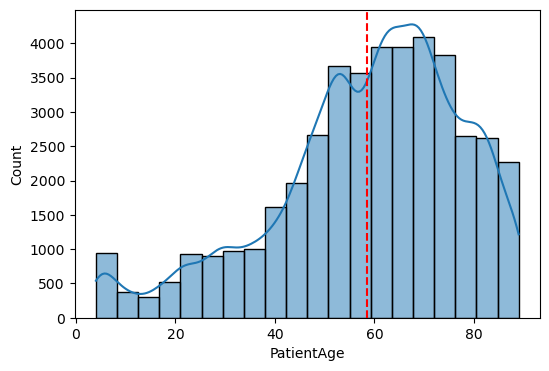

In [17]:
# "PatientAge" variable
x, y = plt.subplots(figsize = (6, 4),dpi=100)
sns.histplot(data=diagnostic_info_rhythm_df["PatientAge"],kde=True,bins=20);
y.axvline(diagnostic_info_rhythm_df["PatientAge"].mean(), color = "r", ls = "--");

## 4. Exploratory Data Analysis(EDA) <a id = 17></a>
[Go to Project Content](#63)

### 4.1 Uni-variate Analysis <a id = 18></a>

#### 4.1.1 Numerical Variables(Analysis with **Distplot**)<a id = 19></a>

In [18]:
numeric_var

['PatientAge']

In [19]:
numeric_axis_name = ["Age of the Patient"]

In [20]:
list(zip(numeric_var, numeric_axis_name))

[('PatientAge', 'Age of the Patient')]

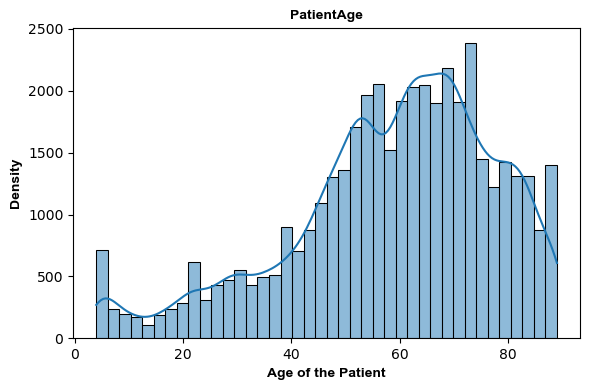

In [21]:
title_font = {"family" : "arial", "color" : "black", "weight" : "bold", "size" : 10}
axis_font = {"family" : "arial", "color" : "black", "weight" : "bold", "size" : 10}

for i, z in list(zip(numeric_var, numeric_axis_name)):
    plt.figure(figsize = (6,4), dpi = 100)
    sns.histplot(data=diagnostic_info_rhythm_df[i],kde=True,bins=40)

    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

#### 4.1.2 Categorical Variables(Analysis with **Pie Chart**) <a id = 21></a>
[Go to Project Content](#63)

In [22]:
categoric_var

['Gender', 'RawRhythm', 'MergedRhythm']

In [23]:
categoric_axis_name = ["Gender","Raw Rhythm Type", "Merged Rhythm Type"]

In [24]:
list(zip(categoric_var, categoric_axis_name))

[('Gender', 'Gender'),
 ('RawRhythm', 'Raw Rhythm Type'),
 ('MergedRhythm', 'Merged Rhythm Type')]

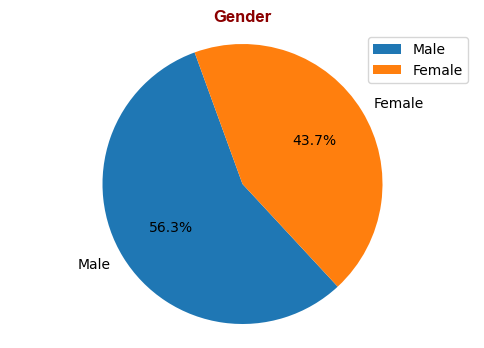

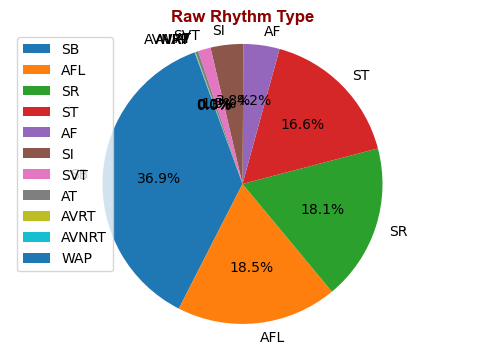

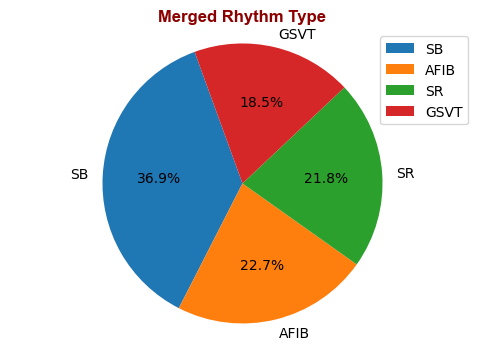

In [25]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 12}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 12}

for i, z in list(zip(categoric_var, categoric_axis_name)):
    fig, ax = plt.subplots(figsize = (6, 4),dpi = 100)
    
    observation_values = list(diagnostic_info_rhythm_df[i].value_counts().index)
    total_observation_values = list(diagnostic_info_rhythm_df[i].value_counts())
    
    ax.pie(total_observation_values, labels= observation_values, autopct = '%1.1f%%', startangle = 110, labeldistance = 1.1)
    ax.axis("equal") # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.title((z), fontdict = title_font) # Naming Pie Chart Titles
    plt.legend()
    plt.show()